In [1]:
# Importing the required packages
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import seaborn as sns

# Let's understand the data which is available over following link

https://archive.ics.uci.edu/ml/machine-learning-databases/balance-scale/balance-scale.names

## Source Information: 
    (a) Source: Generated to model psychological experiments reported
		by Siegler, R. S. (1976).  Three Aspects of Cognitive
		Development.  Cognitive Psychology, 8, 481-520.
    (b) Donor: Tim Hume (hume@ics.uci.edu)
    (c) Date: 22 April 1994

### 1. Relevant Information: 
    This data set was generated to model psychological
    experimental results.  Each example is classified as having the
    balance scale tip to the right, tip to the left, or be
    balanced.  The attributes are the left weight, the left
    distance, the right weight, and the right distance.  The
    correct way to find the class is the greater of 
    (left-distance * left-weight) and (right-distance *
    right-weight).  If they are equal, it is balanced.

### 2. Number of Instances: 625 (49 balanced, 288 left, 288 right)

### 3. Number of Attributes: 4 (numeric) + class name = 5

### 4.. Attribute Information:

    1. Class Name: 3 (L, B, R)
    2. Left-Weight: 5 (1, 2, 3, 4, 5)
    3. Left-Distance: 5 (1, 2, 3, 4, 5)
    4. Right-Weight: 5 (1, 2, 3, 4, 5)
    5. Right-Distance: 5 (1, 2, 3, 4, 5)

### 5. Missing Attribute Values: 
    none

### 6. Class Distribution: 

   1. 46.08 percent are L
   2. 07.84 percent are B
   3. 46.08 percent are R

In [11]:
# Function importing Dataset
def importdata():
    
    # For Balance dataset from cloud
    #balance_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-'+'databases/balance-scale/balance-scale.data',
    #sep= ',', header = None) # Original data have been downloaded from this link & 
                             # then have been assigned the column name, 
                            #this work done code is available ata the bottom of this code
    
    # Now importing the same data from our local machine
    
    #balance_data = pd.read_csv('Datasets\scalebalance_data.csv')
    
    # For Iris dataset from my local system
    
    balance_data = pd.read_csv('Datasets\iris.csv')
    
    # Printing the dataswet shape
    print ("Dataset Length: ", len(balance_data))
    print ("Dataset Shape: ", balance_data.shape)
    
    # Printing the dataset obseravtions
    print ("Dataset: ",balance_data.head())
    return balance_data

In [13]:
# Function to split the dataset
def splitdataset(balance_data):

    # Separating the target variable
    #X = balance_data.values[:, 1:5]
    #Y = balance_data.values[:, 0]

    X = balance_data.values[:, 0:4]
    Y = balance_data.values[:, 4]
    
    # Splitting the dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size = 0.25, random_state = 100)
    
    return X, Y, X_train, X_test, y_train, y_test

In [14]:
# Function to perform training with giniIndex.

def train_using_gini(X_train, X_test, y_train):

    # Creating the classifier object
    clf_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=3, min_samples_leaf=5)

    # Performing training
    clf_gini.fit(X_train, y_train)
    
    return clf_gini

### Gini index:
    
    1. Gini Index is a metric to measure how often a randomly chosen element would be incorrectly identified.
    2. It means an attribute with lower gini index should be preferred.
    3. Sklearn supports “gini” criteria for Gini Index and by default, it takes “gini” value.

### Entropy:

    1. Entropy is the measure of uncertainty of a random variable, it characterizes the impurity of an arbitrary collection of examples. The higher the entropy the more the information content.

    2. The entropy typically changes when we use a node in a decision tree to partition the training instances into smaller subsets. Information gain is a measure of this change in entropy.

    3. Sklearn supports “entropy” criteria for Information Gain and if we want to use Information Gain method in sklearn then we have to mention it explicitly.

In [15]:
# Function to perform training with entropy.
def tarin_using_entropy(X_train, X_test, y_train):

    # Decision tree with entropy
    clf_entropy = DecisionTreeClassifier(
            criterion = "entropy", random_state = 100,
            max_depth = 3, min_samples_leaf = 5)

    # Performing training
    clf_entropy.fit(X_train, y_train)
    
    return clf_entropy

In [16]:
# Function to make predictions
def prediction(X_test, clf_object):

    # Predicton on test with giniIndex
    y_pred = clf_object.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred

### Accuracy score

Accuracy score is used to calculate the accuracy of the trained classifier.

### Confusion Matrix

Confusion Matrix is used to understand the trained classifier behavior over the test dataset or validate dataset.

In [17]:
# Function to calculate accuracy
def cal_accuracy(y_test, y_pred):
    
    print("Confusion Matrix: \n ",
        confusion_matrix(y_test, y_pred))
    
    print ("Accuracy : \n ",
    accuracy_score(y_test,y_pred)*100)
    
    print("Report : ",
    classification_report(y_test, y_pred))
    
    Heatmap(y_test, y_pred)

In [18]:
def Heatmap (y_test, y_pred):
    
    sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)
    

In [19]:
# Driver code
def main():
    
    # Building Phase
    data = importdata()
    print('\n')
    print(data)
    X, Y, X_train, X_test, y_train, y_test = splitdataset(data)
    clf_gini = train_using_gini(X_train, X_test, y_train)
    clf_entropy = tarin_using_entropy(X_train, X_test, y_train)
        
    # Operational Phase
    print("Results Using Gini Index:")
    
    # Prediction using gini
    y_pred_gini = prediction(X_test, clf_gini)
    cal_accuracy(y_test, y_pred_gini)
    
    print("Results Using Entropy:")
    # Prediction using entropy
    y_pred_entropy = prediction(X_test, clf_entropy)
    cal_accuracy(y_test, y_pred_entropy)
    

Dataset Length:  150
Dataset Shape:  (150, 5)
Dataset:     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width    Species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146   

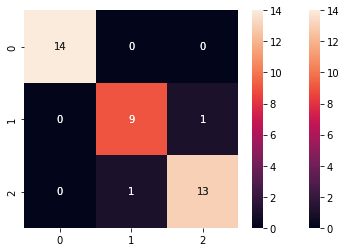

In [20]:
# Calling main function
if __name__=="__main__":
    main()

In [11]:
# Importing of the original data from source and storing it in our system

#import pandas as pd
#balance_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-'+'databases/balance-scale/balance-scale.data',
#    sep= ',', header = None)

#balance_data.columns =['Class Name', 'Left-Weight', 'Left-Distance', 'Right-Weight', 'Right-Distance']

In [12]:
#balance_data.head(5)

In [13]:
#balance_data.to_csv('Datasets\scalebalance_data.csv', index = False)

#### Drawback of decision tree is, it yeilds overfitting model and the Solution is ensemble models (Group of models) = Random Forest !!